# LGM Data Dcience Task 1 Beginner Iris Flower Classification.

In [1]:
pip install ucimlrepo

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
names=["Sepal_Length","Sepal_Width","Petal_Length_in_cm","Petal_Width","Flower_Class"])
df

,Sepal_Length,Sepal_Width,Petal_Length_in_cm,Petal_Width,Flower_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length_in_cm,Petal_Width,Flower_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length        150 non-null    float64
 1   Sepal_Width         150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width         150 non-null    float64
 4   Flower_Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length_in_cm,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# Checking for missing values
missing_val = df.isna().sum()
print(missing_val)

Sepal_Length          0
Sepal_Width           0
Petal_Length_in_cm    0
Petal_Width           0
Flower_Class          0
dtype: int64


In [17]:
# Checking for unique values
unique_val_set = set(df["Flower_Class"])
print(unique_val_set)

{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


C:\Users\rauna\AppData\Local\Temp\ipykernel_16364\4263710208.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


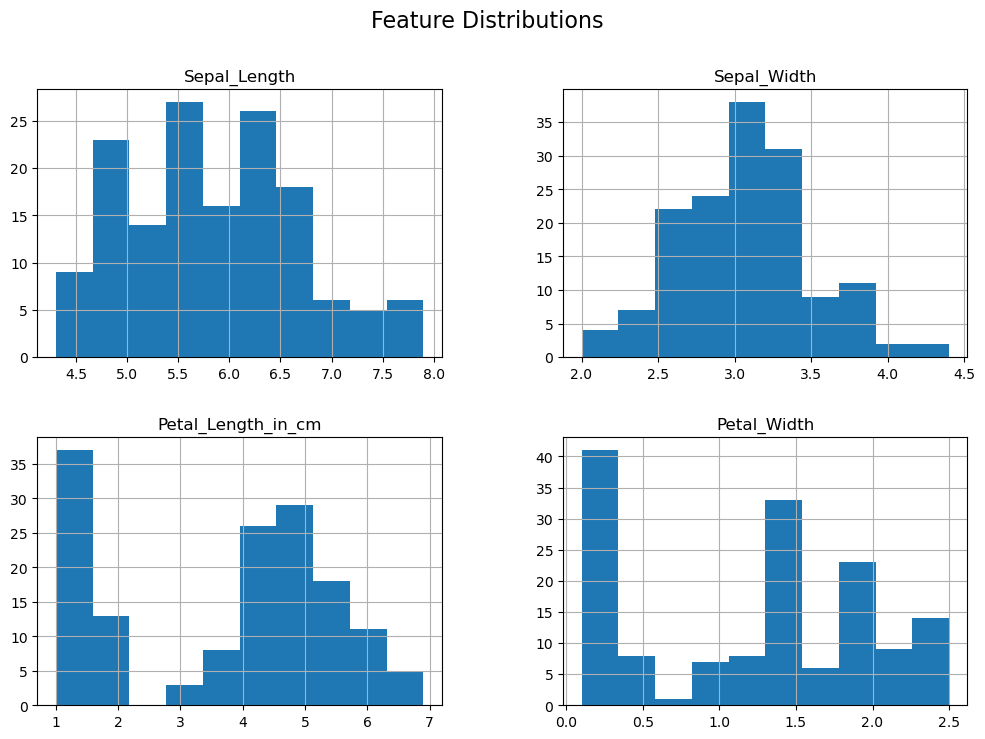

In [33]:
# Visualizing feature distributions with histograms
fig, ax = plt.subplots(figsize=(12, 8))
df.hist(ax=ax)
fig.suptitle('Feature Distributions', fontsize=16)
plt.show()


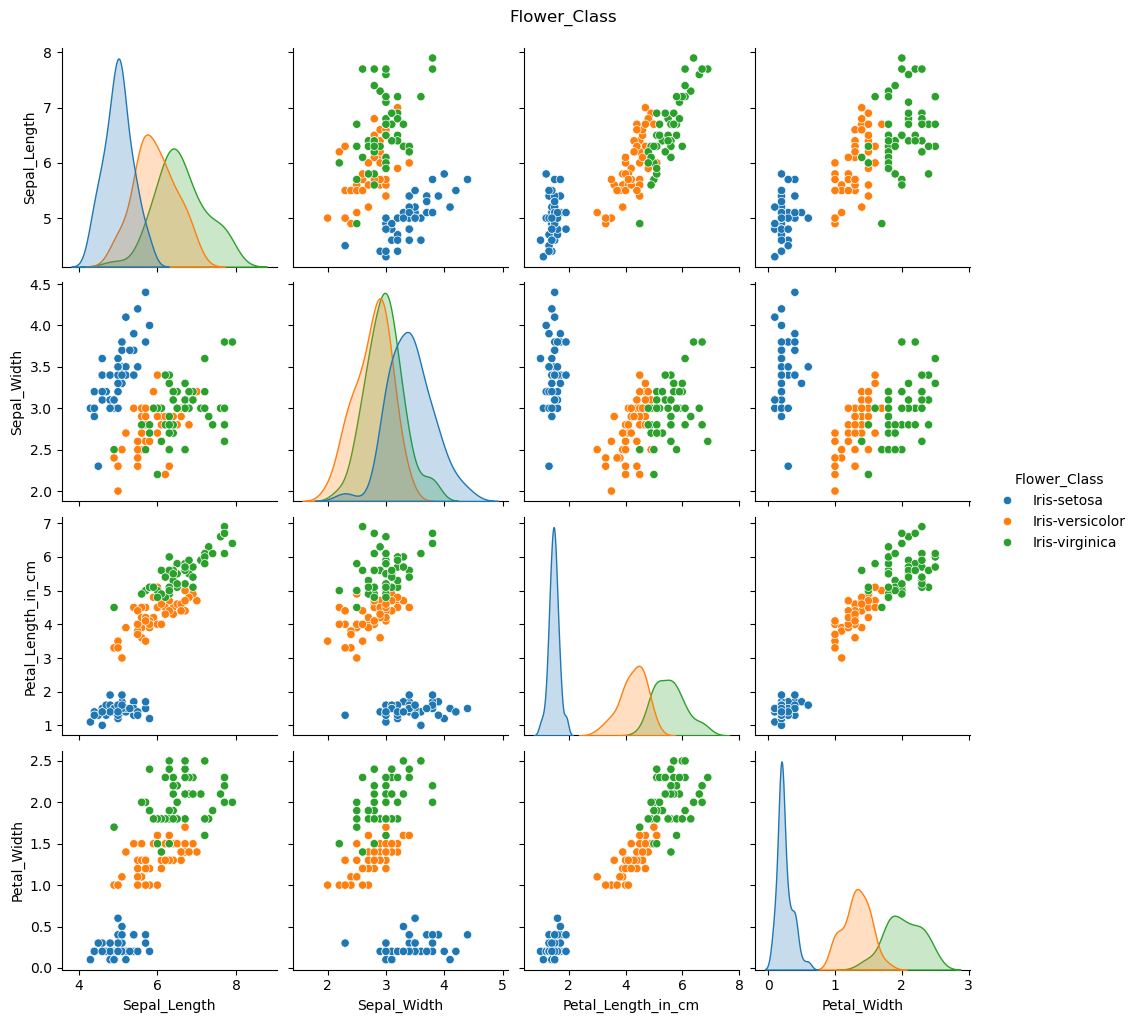

In [34]:
#Using Pairplots to visyalise b/w features and classes.
sns.pairplot(df, hue='Flower_Class', diag_kind='kde') 
plt.suptitle("Flower_Class", y=1.02)
plt.show()

In [35]:
# Encoding Flower classes and splitting into training and testing sets
df['Flower_Class'], _ = pd.factorize(df['Flower_Class'])

# Split the data into features and target variable
X = df.drop(columns=['Flower_Class'])
y = df['Flower_Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [37]:
#Using Logistic regression as the first model

logic_reg = LogisticRegression(max_iter = 500)
logic_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_logic_reg = logic_reg.predict(X_test)
logic_reg_accuracy = accuracy_score(y_test, y_pred_logic_reg)
print(f'Logistic Regression Accuracy: {logic_reg_accuracy:.2f}')

# Display classification report and confusion matrix
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logic_reg))

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logic_reg))



Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Logistic Regression Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [38]:
#Using a dummy dlassifier to check accuracy
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_accuracy = dummy_clf.score(X_test, y_test)
print(f'Dummy Classifier Accuracy: {dummy_accuracy:.2f}')


Dummy Classifier Accuracy: 0.29


Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Decision Tree Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


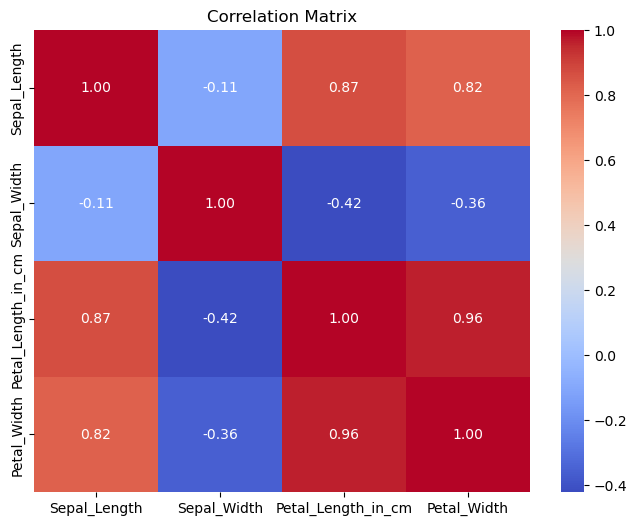

In [43]:
# Using Decision trees as the second model.

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


y_pred_dtc = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
print(f'Decision Tree Accuracy: {dtc_accuracy:.2f}')

# Display classification report and confusion matrix
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dtc))

print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dtc))

# Calculate and display the correlation matrix of the features
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
